Cell 0: Quick Error Check

In [9]:
import torch
torch.__version__

'2.9.1+cpu'

Cell 1: Imports and Setup

In [10]:
from pathlib import Path
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
DATA_DIR = PROJECT_ROOT / "data" / "raw" / "EuroSAT_RGB"

print("Project root:", PROJECT_ROOT)
print("Data dir:", DATA_DIR)

Project root: c:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model
Data dir: c:\Users\adamc\Documents\Projects\GeoAI-LandUse-Model\data\raw\EuroSAT_RGB


Cell 2: Basic Dataset

In [11]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root=str(DATA_DIR), transform=transform)

print("Number of images:", len(dataset))
print("Number of classes:", len(dataset.classes))
print("Classes:", dataset.classes)

Number of images: 27000
Number of classes: 10
Classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


Cell 3: Visualize a Branch

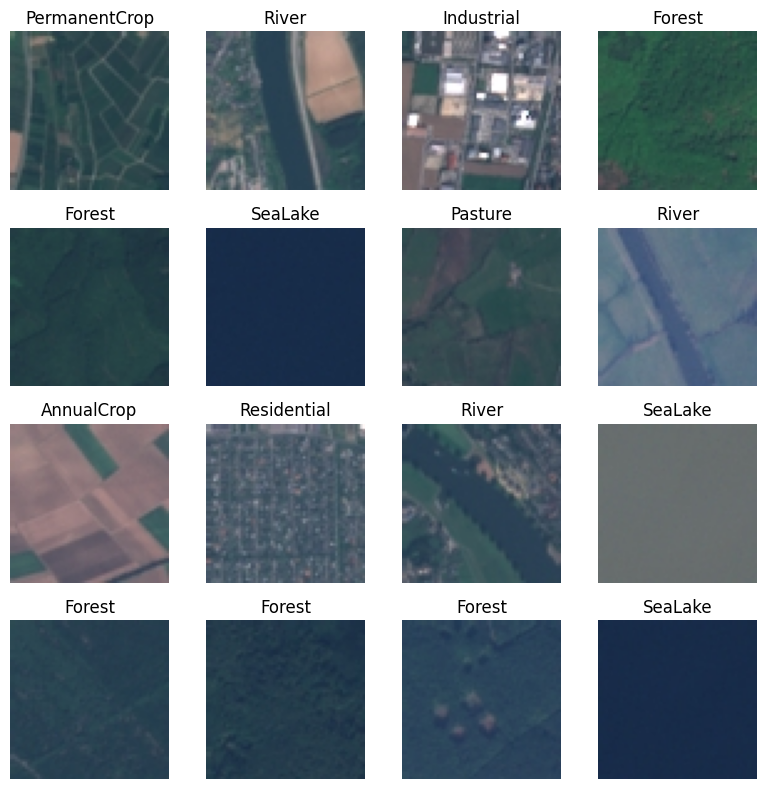

In [12]:
loader = DataLoader(dataset, batch_size=16, shuffle=True)

images, labels = next(iter(loader))

def show_batch(imgs, labels, classes, n=16):
    plt.figure(figsize=(8, 8))
    for i in range(n):
        plt.subplot(4, 4, i + 1)
        img = imgs[i].permute(1, 2, 0)  # [C, H, W] -> [H, W, C]
        # undo normalization if you add it later
        plt.imshow(img)
        plt.title(classes[labels[i]])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_batch(images, labels, dataset.classes, n=16)